# Display a Webcam Frame with OpenCV 4.x.x & Python 3.8

Jupyter line magic to read a webcam with OpenCV and display the image.

In [1]:
import sys

# https://github.com/jed-frey/build_opencv
sys.path.append("/opt/opencv4/lib/python3.8/site-packages")

import cv2
from PIL import Image
from IPython.display import display

Test environment:

In [2]:
sys.platform

'linux'

In [3]:
sys.version

'3.8.0 (default, Oct 28 2019, 16:14:01) \n[GCC 8.3.0]'

In [4]:
cv2.__version__

'4.1.2'

In [5]:
import timeout_decorator

In [6]:
class VideoCapture2(cv2.VideoCapture):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    @property
    def frame(self):
        ret, frame = self.read()
        if ret:
            return frame
        else:
            raise Exception("Reading Failed")
        
    def pil_img(self):
        img = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
        return Image.fromarray(img)
    
    def __enter__(self):
        return self
    
    @timeout_decorator.timeout(10)
    def __exit__(self,type, value, traceback):
        while self.isOpened():
            self.release() 

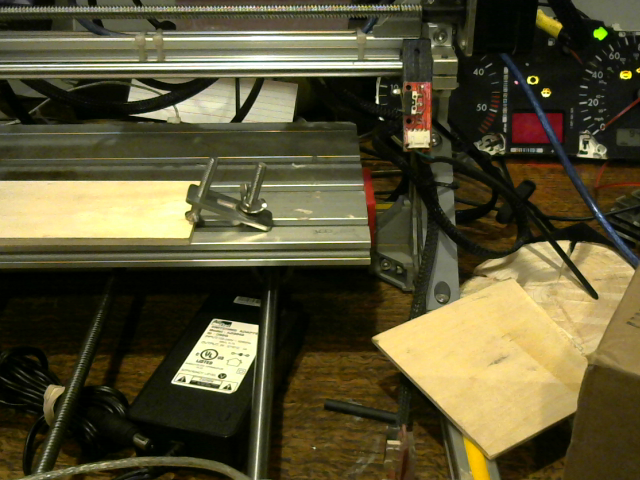

In [7]:
with VideoCapture2(0) as cap:
    img = cap.pil_img()
    display(img)

In [7]:
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def webcam(*args, **kwargs):
    webcams = [arg for arg in args[0].split(" ")]
    for webcam in webcams:
        if webcam.startswith("/dev/video"):
            webcam = int(webcam.split("/dev/video")[-1])
        else:
            try:
                webcam = int(webcam)
            except:
                pass
        with VideoCapture2(webcam) as cap:
            img = cap.pil_img()
            display(img)

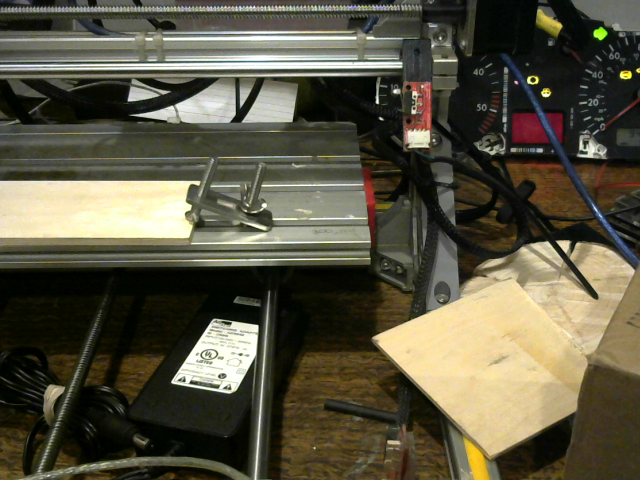

In [9]:
%webcam /dev/video0

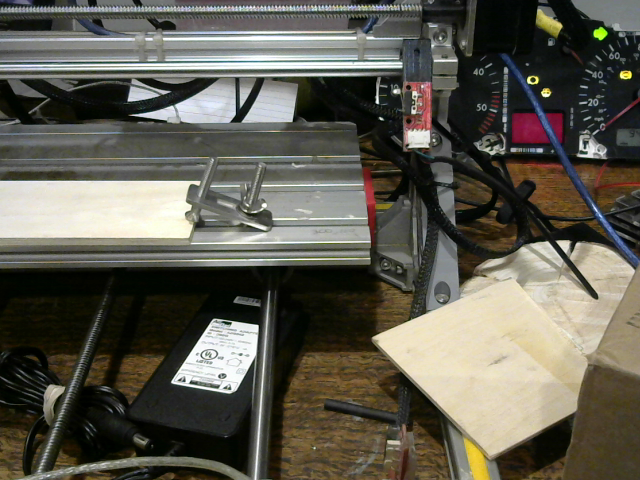

In [10]:
%webcam 0

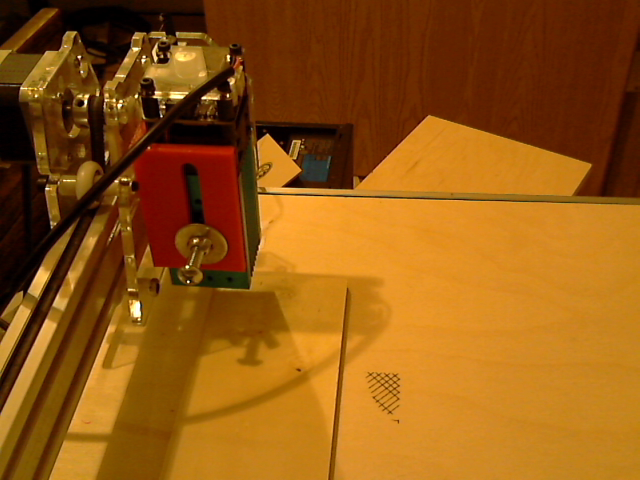

In [11]:
%webcam 2

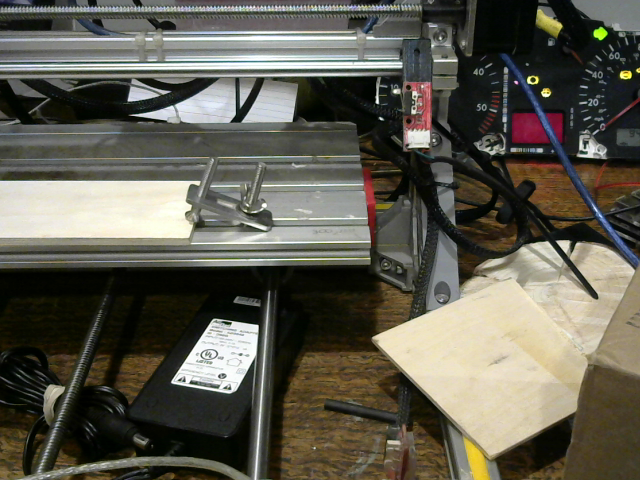

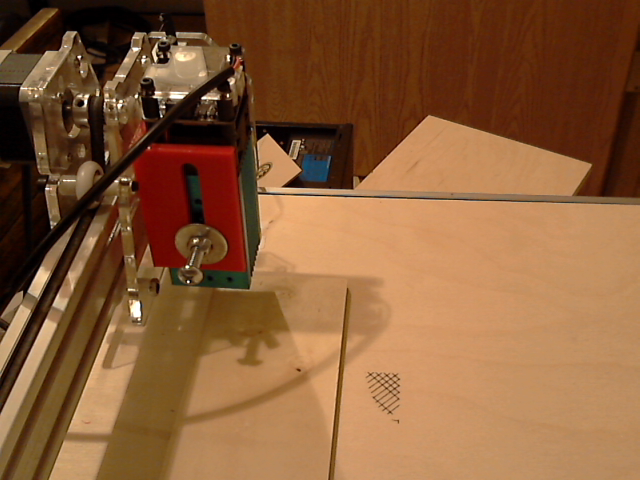

In [12]:
%webcam 0 2

In [ ]:
%webcam /dev/video0 /dev/video2

In [16]:
os.environ["WEBCAM_IP"]

'172.16.11.76:554'

In [14]:
import os
auth = os.environ["WEBCAM_AUTH"]
ip   = os.environ["WEBCAM_IP"]

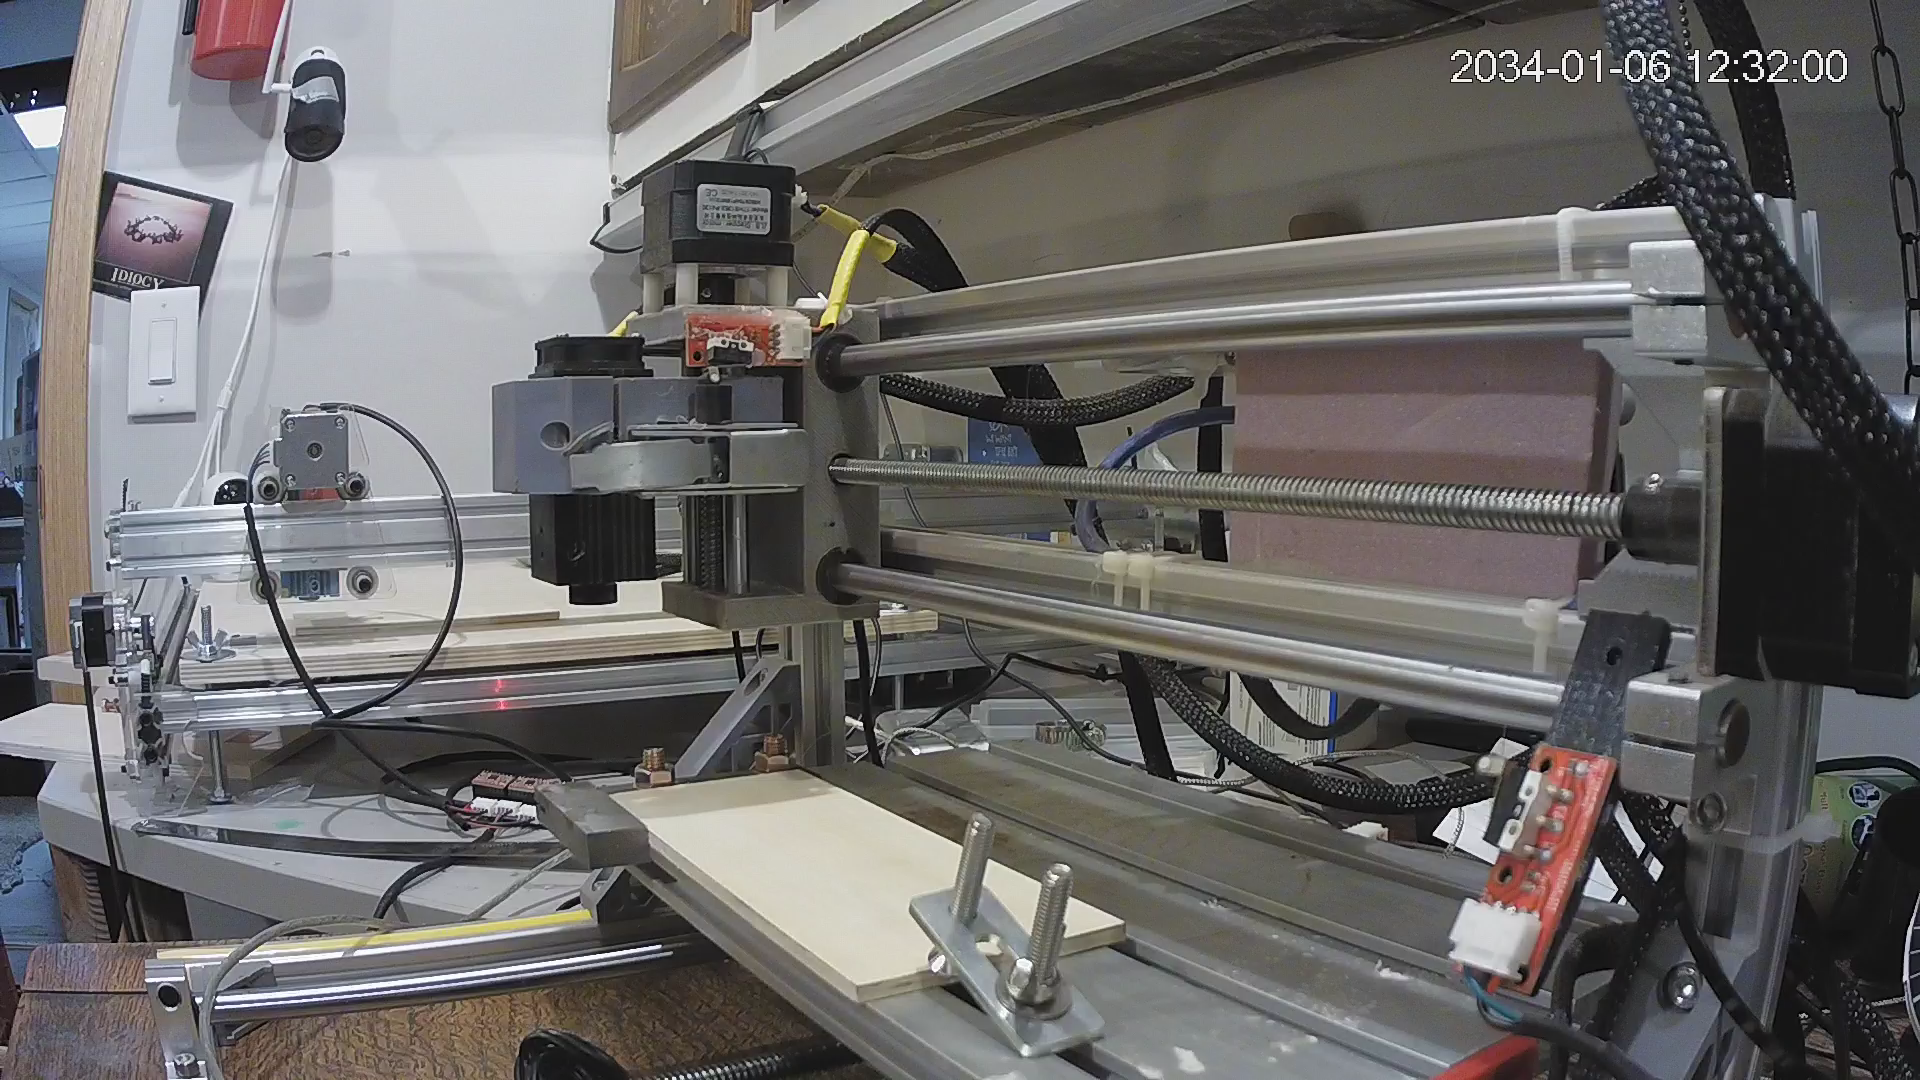

In [15]:
%webcam rtsp://$auth@$ip/cam/realmonitor?channel=1&subtype=0